In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv('medical_examination.csv')
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.age

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [4]:
# The age column looks funny.
df.age 
# their ages are in days 
# we'll convert it to years 
(df.age / 365).sort_values(ascending = True).astype(int)
# The youngest patient is 29 years old.
# The oldest is 64 




22343    29
30666    29
6219     29
55905    30
31762    39
         ..
36603    64
20931    64
50714    64
68005    64
57191    64
Name: age, Length: 70000, dtype: int32

In [5]:
df.age = (df.age / 365).astype(np.int64)

In [6]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
df.info()
# clean data, there no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### *To find the patients who are overweight, <br/>the bmi of each patient is needed.*
##### The formula is given below:

> ### $ BMI = \frac{weight(kg)}{(height(m))^2} $

In [8]:

# first calculate the bmi of each patient 
# the height column is given in cm, therefore it must be converted m

bmi = df.weight / (df.height/100)**2

In [9]:
# Adding the overweight column to the dataframe 
# If the bmi > 25, the patient is over weight

df['overweight'] = bmi > 25

In [10]:
df['overweight'] # a bool dtype 

0        False
1         True
2        False
3         True
4        False
         ...  
69995     True
69996     True
69997     True
69998     True
69999    False
Name: overweight, Length: 70000, dtype: bool

In [11]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,True
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,True
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,True
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,True
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,True
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,True


In [12]:
# convert the overweight column to a binary value type.
overweight_convert = {
    True: 1,
    False: 0
}

df["overweight"].replace(overweight_convert, inplace=True) # a binary value type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [14]:
# Value count for overweight patients 
df.overweight.value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [15]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,1


In [16]:
# Normalize the data by making 0 always good and 1 always bad. 
# If the value of cholesterol or gluc is 1, we will make the value 0(good). If the value is more than 1(2 or 3), 
# make the value 1(bad).

level_change= {
    1 : 0,
    2 : 1,
    3 : 1
}
df['cholesterol'].replace(level_change, inplace=True)

In [17]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [18]:
# Apply the same change to the gluc column
df['gluc'].replace(level_change, inplace=True)

In [19]:
df.overweight.value_counts() # all values have been normalized. 0s and 1s

1    43546
0    26454
Name: overweight, dtype: int64

> ##### Straight to visualization!

 Create a chart that shows the value counts of the categorical features using seaborn's countplot.

 But first we must group the df based on cardio.
 Those with `cardiovascular diseases(cardio == 1)`
 and those without`(cardio == 0)`

In [20]:
df_cat = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [21]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()

In [22]:
df_cat

,cardio,variable,value,0
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


In [23]:
# rename the last column.
df_cat = df_cat.rename({0 : 'total'}, axis=1)

In [24]:
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


> The table has two categories.<br/>
> Those without a cardiac disease(Cardio == 0)<br/>
> And those with cardiac disease(Cardio == 1)

> ### A plot showing the value counts of each categorical feature

In [25]:
# sns.catplot(y='variable', hue='value', x='total', kind='bar', data=df_cat, row='cardio')

<Figure size 432x288 with 0 Axes>

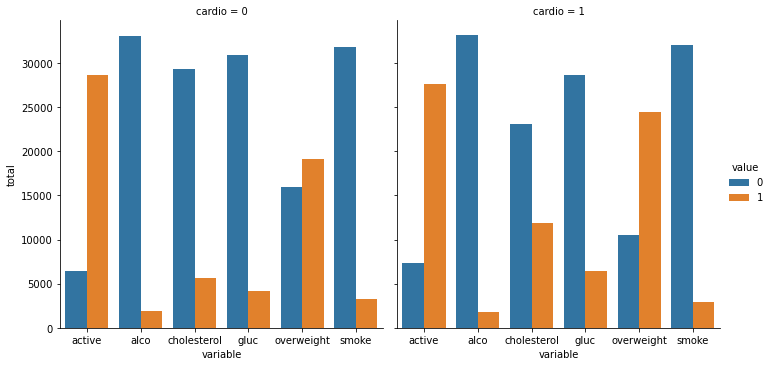

In [26]:
plt.figure()

fig = sns.catplot(x='variable', y='total',
    data=df_cat,
    hue='value',
    col='cardio',
    kind='bar')

plt.show()

The graphic shows that `cholesterol` and `glucose` levels have a major impact on cardiac illnesses.
People with higher `cholesterol` and `glucose` levels are more likely to develop heart disease.
Same for those who are `overweight`.

### Filtering the data

### Data Cleaning

Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct<br/>
data with `(df['ap_lo'] <= df['ap_hi']))`
* height is less than the 2.5th percentile<br/>(Keep the correct data with `(df['height'] >= df['height'].quantile(0.025)))`
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [29]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

In [ ]:

# select patients who have the medically correct diastolic and systolic pressue 
# i.e diastolic pressure <= systolic 

mask = df['ap_lo'] <= df['ap_hi']
df[mask]

In [ ]:
df

In [ ]:
# selecting those whose heights are greater than the 2.5th percentile
height_mask = df['height'] >= df['height'].quantile(0.025)
df[height_mask]

In [ ]:
# those whose heights are less than the 97.5th percentile
df[df['height'] <= df['height'].quantile(0.975)]

In [ ]:
# those whose weights are greater than the 2.5th percentile
df[df['weight'] >= df['weight'].quantile(0.025)]

In [ ]:
# weights are less than the 97.5th percentile
df[df['weight'] <= df['weight'].quantile(0.975)]

In [ ]:
df.shape

In [ ]:
# Creating a correlation matrix 

corr_matrix = df_heat.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.1f')
plt.show()

In [ ]:
# Modifying the shape of the heatmap
# Masking the upper triangle 
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', square=True, linewidths=0.2, vmin=-0.08, vmax=0.24, cbar_kws={'shrink': 0.6}, mask=mask)
plt.show()

In [ ]:
# np.triu(np.ones_like(corr_matrix, dtype=np.float64))

In [ ]:
# sns.heatmap?